<a href="https://colab.research.google.com/github/wrodrigohs/portfolio/blob/main/Detec%C3%A7%C3%A3o_de_fraude_em_cart%C3%B5es_de_cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> ### <center>Encontre meus projetos, meus artigos e meu perfil profissional</center>

<table>
  <tr align = "right">
  <td style='text-align:center; vertical-align:middle'><a href="https://github.com/wrodrigohs/portfolio">
  <img hspace = 55 src="https://cdn.iconscout.com/icon/free/png-256/github-1521500-1288242.png" width="33.3%" title="Acesse meu Github e veja meu portfólio" />
  </a>
  </td>
  <td style='text-align:center; vertical-align:middle'>
  <a href="https://medium.com/@wrodrigohs">
  <img hspace = 55 src="https://cdn.iconscout.com/icon/free/png-256/medium-3855923-3201557.png" width="33.3%" title="Leia meus artigos no Medium"/>
  </a>
  </td>
  <td style='text-align:center; vertical-align:middle'><a href="https://www.linkedin.com/in/wrodrigohs/"><img hspace = 55 src="https://logoeps.com/wp-content/uploads/2014/09/34405-linkedin-logo-icon-vector-icon-vector-eps.png" width="33.3%" title="Encontre meu perfil profissional" />
  </a>
  </td>
  </tr>
</table>

## <center>**O uso de inteligência artificial para detecção de fraudes em cartões de crédito**</center>



> Por Wallynson Rodrigo

# Detecção de Fraudes em Cartões de Crédito

Anualmente, as perdas globais totais devidas a fraudes financeiras têm sido demonstradas estar na faixa de bilhões de dólares, com algumas estimativas sugerindo um custo anual para os Estados Unidos acima de 400 bilhões de dólares, segundo Waleed Hilal, S. Andrew Gadsden e John Yawney, no artigo entitulado "*Financial Fraud: A Review of Anomaly Detection Techniques and
Recent Advances*".

Entre essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*.

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importação das bibliotecas

In [ ]:
# importando os pacotes necessários
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.graph_objs import Layout
import graphviz
import xgboost as xgb
import sklearn.metrics as metrics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.linear_model    import LogisticRegression, SGDClassifier
from sklearn.tree            import DecisionTreeClassifier, plot_tree, export_graphviz, export_text
from sklearn.metrics         import classification_report
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import mean_squared_error, mean_absolute_error
from sklearn.metrics         import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics         import roc_curve, roc_auc_score

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling  import ADASYN, BorderlineSMOTE, SMOTE

import warnings
warnings.filterwarnings("ignore")

## Importação dos dados para um dataframe

In [ ]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"
df = pd.read_csv(file_path)

## Análise exploratória

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.isnull().sum()/len(df)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [ ]:
df[['Time', 'Amount']].describe().round(2)

,Time,Amount
count,284807.00,284807.00
mean,94813.86,88.35
std,47488.15,250.12
min,0.00,0.00
25%,54201.50,5.60
50%,84692.00,22.00
75%,139320.50,77.16
max,172792.00,25691.16


In [ ]:
my_layout = Layout(hoverlabel = dict(bgcolor = '#FFFFFF'), template='simple_white')

fig = go.Figure(layout = my_layout)
fig.add_trace(go.Box(
    y=df.Amount[df['Class'] == 0],
    name='Transações normais',
    marker_color='#0C3559',
    boxmean=True,
    boxpoints='outliers',
    hovertext='casa'
))
fig.add_trace(go.Box(
    y=df.Amount[df['Class'] == 1],
    name='Transações fradulentas',
    marker_color='#3698BF',
    boxmean=True
))

fig.update_layout(
    height = 500,
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        },
    title_text='Gráfico do resumo estatístico das transações',
    title_font_color='#0C3559',
    title_font_size=20,
    yaxis_range=[-10,500],
    showlegend=False,
    hoverlabel=dict(bgcolor='#FFFFFF'))

plotly.offline.plot(fig, filename = 'filename.html', auto_open=False)

fig.show()

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

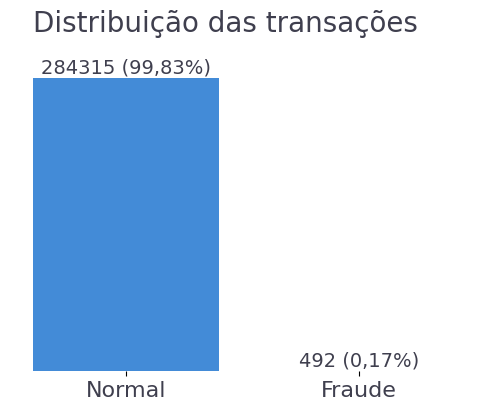

In [ ]:
# plotar gráfico de barras para as Classes
fig, ax = plt.subplots(figsize=(6,4))

sns.countplot(data=df, x='Class', palette=['#2A8BF0', '#F03131'])

ax.set_frame_on(False)

ax.text(-0.4, df.Class.value_counts()[0] + 45000, 'Distribuição das transações', fontsize = 20, color = '#3f3f4e')

ax.get_yaxis().set_visible(False)
ax.set_xticklabels(['Normal', 'Fraude'], fontsize=16, color='#3f3f4e')
ax.set_xlabel('')

for i in ax.patches:
  ax.text(i.get_x() + i.get_width() / 2,
          i.get_height() + 5000,
          '{} ({:0,.2f}%)'.format(int(i.get_height()), (i.get_height()/int(df.Class.value_counts()[0] + df.Class.value_counts()[1])) * 100).replace('.',','),
          ha = 'center',
          fontsize=14, color='#3f3f4e')

No gráfico acima fica claro o quão desbalanceadas estão as classes nesse conjunto de dados. 99% das transações são normais e, consequentemente, apenas 1% são fraudulentas. Isso é ótimo para um contexto genérico, mas, para o desenvolvimento de um modelo de machine learning para previsão de transações fraudulentas é ruim.

**Transações por tempo**

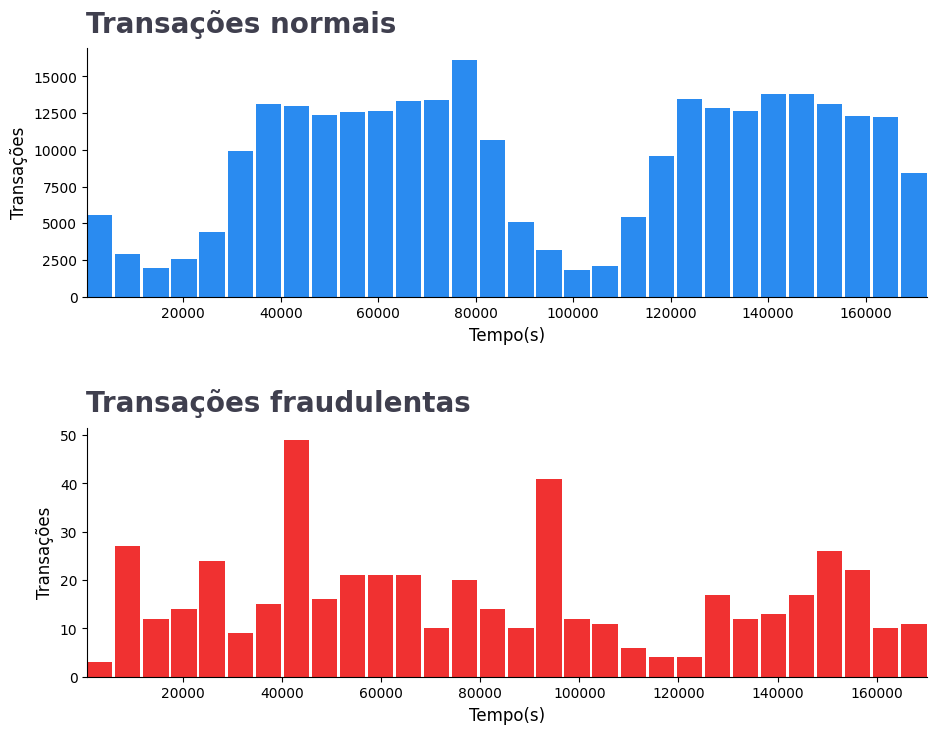

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols = 1, figsize=(10, 8))

ax[0].hist(df.Time[df.Class == 0], bins = 30, color = '#2A8BF0', rwidth= 0.9)

ax[0].text(df.Time[df.Class == 0].min(), 18000, "Transações normais",
          fontsize = 20,
          color = '#3f3f4e',
          fontweight= 'bold')

ax[0].set_xlabel('Tempo(s)', fontsize = 12, color= '#000000')
ax[0].set_ylabel('Transações', fontsize = 12, color= '#000000')

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[0].margins(x=0)

ax[1].hist(df.Time[df.Class == 1], bins = 30, color= '#F03131', rwidth= 0.9)

ax[1].text(df.Time[df.Class == 1].min(), 55, "Transações fraudulentas",
          fontsize = 20,
          color = '#3f3f4e',
          fontweight= 'bold')

ax[1].set_xlabel('Tempo(s)', fontsize = 12, color= '#000000')
ax[1].set_ylabel('Transações', fontsize = 12, color= '#000000')

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[1].margins(x=0)

plt.tight_layout(pad = 3.0)

**Transações por valor**

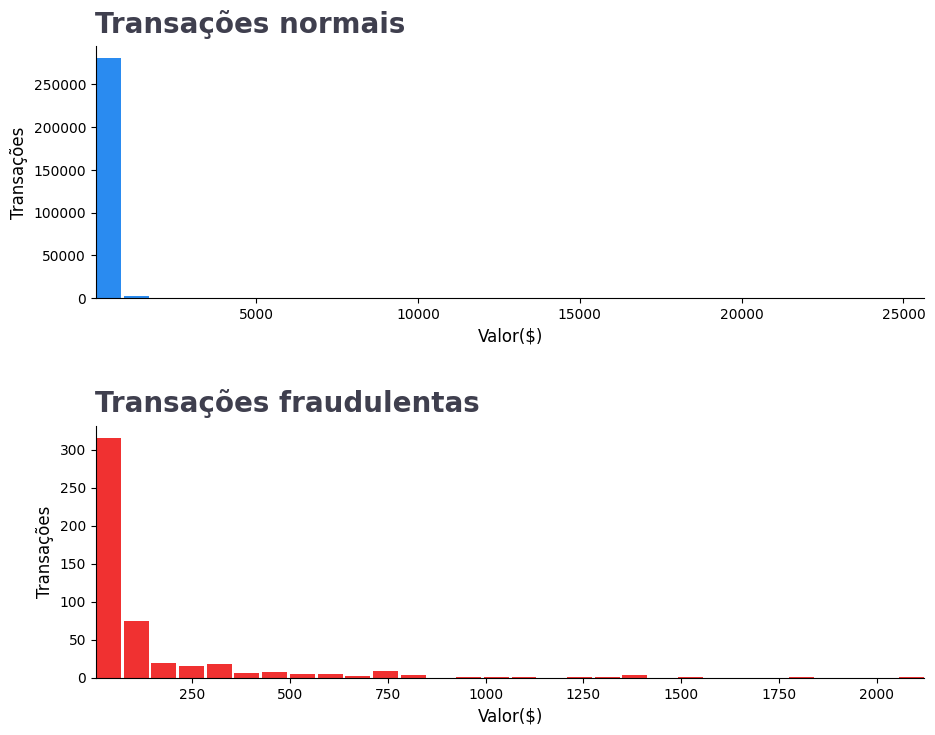

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

ax[0].hist(df.Amount[df.Class == 0], bins = 30, color = '#2A8BF0', rwidth= 0.9)

ax[0].text(df.Amount[df.Class == 0].min(), 310000, "Transações normais",
          fontsize = 20,
          color = '#3f3f4e',
          fontweight= 'bold')

ax[0].set_xlabel('Valor($)', fontsize = 12, color= '#000000')
ax[0].set_ylabel('Transações', fontsize = 12, color= '#000000')

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[0].margins(x=0)

ax[1].hist(df.Amount[df.Class == 1], bins = 30, color = '#F03131', rwidth= 0.9)

ax[1].text(df.Amount[df.Class == 1].min(), 350, "Transações fraudulentas",
          fontsize = 20,
          color = '#3f3f4e',
          fontweight= 'bold')

ax[1].set_xlabel('Valor($)', fontsize = 12, color= '#000000')
ax[1].set_ylabel('Transações', fontsize = 12, color= '#000000')

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[1].margins(x=0)

plt.tight_layout(pad = 3.0)

In [ ]:
# Descrição estatística das transações Normais
df['Amount'][df['Class'] == 0].describe().round(2)

count    284315.00
mean         88.29
std         250.11
min           0.00
25%           5.65
50%          22.00
75%          77.05
max       25691.16
Name: Amount, dtype: float64

In [ ]:
# Descrição estatística das transações fraudulentas
df['Amount'][df['Class'] == 1].describe().round(2)

count     492.00
mean      122.21
std       256.68
min         0.00
25%         1.00
50%         9.25
75%       105.89
max      2125.87
Name: Amount, dtype: float64

Nas células acima é possível notar pontos interessantes:
- a média de valor das transações normais é de $88,29;

- a média de valor das transações fraudulentas é de $122,21;

- 75% das transações normais têm valor de até $77,05;

- 75% das transações fraudulentas têm valor de até $105,89;

- o valor máximo de uma transação normal foi de $25691,16;

- o valor máximo de uma transação fraudulenta foi de $2125,87.

## Transações normais


In [ ]:
valoresTransacoesNormais = df[['Amount', 'Class']]
valoresTransacoesNormais = valoresTransacoesNormais[valoresTransacoesNormais['Class'] == 0]
valoresTransacoesNormais = valoresTransacoesNormais[valoresTransacoesNormais['Amount'] != 0.0]
valoresTransacoesNormais['count'] = valoresTransacoesNormais.groupby('Amount')['Amount'].transform('count')
valoresTransacoesNormais = valoresTransacoesNormais.sort_values(by=['count', 'Amount'], ascending=False)
valoresTransacoesNormais = valoresTransacoesNormais.drop_duplicates()

valoresTransacoesNormais = valoresTransacoesNormais.reset_index().drop(columns=['index'], axis = 1)

x = valoresTransacoesNormais['Amount'][:10]
y = valoresTransacoesNormais['count'][:10]

colors = ['#0C3559', '#033F73', '#033E8C', '#0378A6', '#049DBF',
          '#3698BF', '#A0C9D9', '#A6ACE6', '#DEE0FC', '#F2F2F2']

my_layout = Layout(hoverlabel=dict(
                  bgcolor='#FFFFFF'),
                  template='simple_white')

fig = go.Figure(data=[
            go.Bar(name='', x=x.index, y=y, hovertemplate=' ',
                   text=y,
                   textposition='outside',
                   marker_color=colors, showlegend=False,),],
            layout=my_layout)

fig.update_layout(
  height=400,
  plot_bgcolor='rgba(0,0,0,0)',
  yaxis_range=[0, 5000],
  yaxis=dict(
      tickvals=[''],))
      # ticktext=['0', '1 mil', '2 mil', '3 mil', '4 mil', '5 mil', '6 mil', '7 mil', '8 mil',
                # '9 mil', '10 mil', '11 mil', '12 mil', '13 mil', '14 mil', '15 mil']))
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        },
    title_text='Valores mais comuns das transações normais',
    title_font_color='#0C3559',
    title_font_size=20,
    plot_bgcolor='rgba(0,0,0,0)',
    yaxis_range=[0,15000],
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        tickvals=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        ticktext=[f"$ {percent:.2f}" for percent in x]),
    yaxis=dict(showgrid=False, zeroline=False))

fig.update_xaxes(title_text='Valores')
fig.update_yaxes(title_text='Ocorrências')

fig.show()

##Transações fraudulentas
Aqui se observa quais os valores mais comuns das transações fraudulentas. Uma observação (talvez curiosa) é que a maior parte delas tem valor de $1,00, talvez por ser um valor baixo e pouco provável de ser barrado.

Outra observação é que as transações fraudulentas, em sua maioria, são de valores baixos.

In [ ]:
valoresTransacoesFraudulentas = df[['Amount', 'Class']]
valoresTransacoesFraudulentas = valoresTransacoesFraudulentas[valoresTransacoesFraudulentas['Class'] == 1]
valoresTransacoesFraudulentas = valoresTransacoesFraudulentas[valoresTransacoesFraudulentas['Amount'] != 0.0]
valoresTransacoesFraudulentas['count'] = valoresTransacoesFraudulentas.groupby('Amount')['Amount'].transform('count')
valoresTransacoesFraudulentas = valoresTransacoesFraudulentas.sort_values(by=['count', 'Amount'], ascending=False)
valoresTransacoesFraudulentas = valoresTransacoesFraudulentas.drop_duplicates()

valoresTransacoesFraudulentas = valoresTransacoesFraudulentas.reset_index().drop(columns=['index'], axis = 1)

x = valoresTransacoesFraudulentas['Amount'][:10]
y = valoresTransacoesFraudulentas['count'][:10]

colors = ['#0C3559', '#033F73', '#033E8C', '#0378A6', '#049DBF', '#3698BF',
          '#A0C9D9', '#A6ACE6', '#DEE0FC', '#F2F2F2']

my_layout = Layout(hoverlabel=dict(
                  bgcolor='#FFFFFF'),
                  template='simple_white')

fig = go.Figure(data=[
            go.Bar(name='', x=x.index, y=y, hovertemplate=' ',
                   text=y,
                   textposition='outside',
                   marker_color=colors, showlegend=False,),],
            layout=my_layout)

fig.update_layout(
  height=400,
  plot_bgcolor='rgba(0,0,0,0)',
  yaxis_range=[0, 150],
  yaxis=dict(
      tickvals=['']))
      # ticktext=['0', '1 mil', '2 mil', '3 mil', '4 mil', '5 mil', '6 mil', '7 mil', '8 mil',
                # '9 mil', '10 mil', '11 mil', '12 mil', '13 mil', '14 mil', '15 mil']))
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        },
    title_text='Valores mais comuns das transações fraudulentas',
    title_font_color='#0C3559',
    title_font_size=20,
    plot_bgcolor='rgba(0,0,0,0)',
    yaxis_range=[0,125],
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        tickvals=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        ticktext=[f"$ {percent:.2f}" for percent in x]),
    yaxis=dict(showgrid=False, zeroline=False))

fig.update_xaxes(title_text='Valores')
fig.update_yaxes(title_text='Ocorrências')

fig.show()

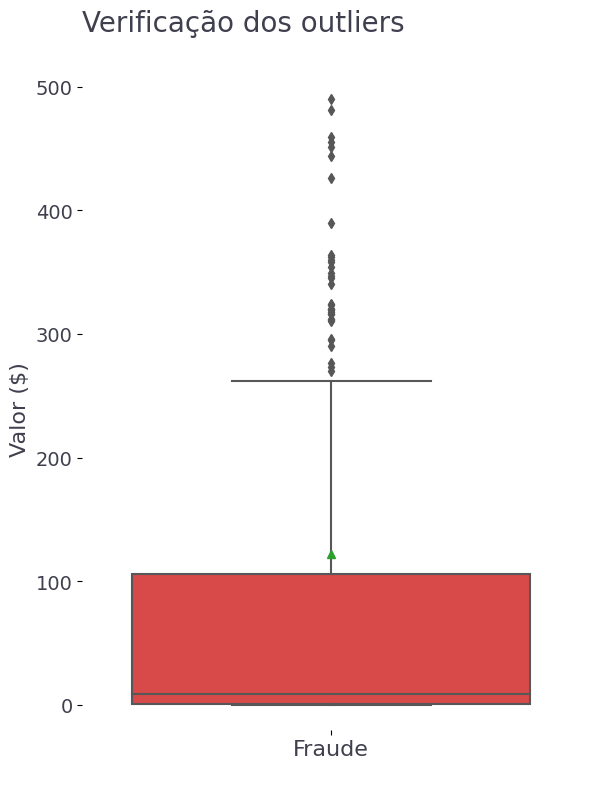

In [ ]:
# plotando boxplot para a variável Amount

fig, ax = plt.subplots(figsize=(6, 8), sharex=True)
ax.set_frame_on(False)
cores = {0: "#2A8BF0", 1:"#F03131"}

sns.boxplot(data = df, x = df.Class[df.Class == 1], y=df.Amount, showmeans=True, ax=ax, palette=cores)

ax.set_title('Verificação dos outliers', loc='left', pad=40, fontdict={'fontsize':20}, color='#3f3f4e');
ax.set_ylabel('Valor ($)', fontsize=16, color='#3f3f4e')
ax.set_xlabel(' ')

plt.ylim((-20, 500))
plt.yticks(fontsize=14, color='#3f3f4e')
plt.xticks([0], ['Fraude'], fontsize=16, color='#3f3f4e')

plt.tight_layout()

## Divisão do conjunto

X e y serão utilizados para criação dos conjuntos de treino e teste, mas, visando **evitar vazamentos de dados** tomarei algumas precauções: uma delas é dar um **drop_duplicates** para que dados já vistos no treinamento dos modelos não estejam presentes durante o teste (isso prejudicaria o resultado).

In [ ]:
df = df.drop_duplicates()
X = df.drop('Class', axis = 1)
y = df['Class']

## Oversampling
Para que o modelo não fique prejudicado em sua aprendizagem, optei por fazer um *oversampling* dos dados de transações fraudulentas para que eles chegassem a 10% do número de transações normais. É interessante mencionar que o SMOTE não copia os dados, mas cria dados sintéticos.

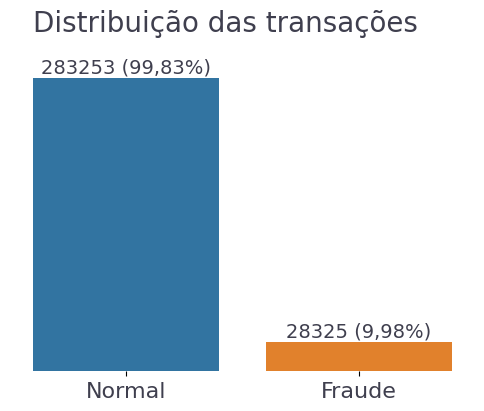

In [ ]:
# adasyn = ADASYN(sampling_strategy= 0.1, random_state=42)
borderLineSMOTE = BorderlineSMOTE(sampling_strategy= 0.1, random_state=42)
# smote = SMOTE(sampling_strategy= 0.1, random_state=42)
X_over,y_over = borderLineSMOTE.fit_resample(X, y)

fig, ax = plt.subplots(figsize=(6,4))

sns.countplot(data = df, x = y_over);

ax.set_frame_on(False)

ax.text(-0.4, df.Class.value_counts()[0] + 45000, 'Distribuição das transações', fontsize = 20, color = '#3f3f4e')

ax.get_yaxis().set_visible(False)
ax.set_xticklabels(['Normal', 'Fraude'], fontsize=16, color='#3f3f4e')
ax.set_xlabel('')

for i in ax.patches:
  ax.text(i.get_x() + i.get_width() / 2,
          i.get_height() + 5000,
          '{} ({:0,.2f}%)'.format(int(i.get_height()), (i.get_height()/int(df.Class.value_counts()[0] + df.Class.value_counts()[1])) * 100).replace('.',','),
          ha = 'center',
          fontsize=14, color='#3f3f4e')

## Undersampling
Após o aumento, eu diminuo o número de transações normais para que os dados fiquem balanceados e melhore o treinamento do modelo final.

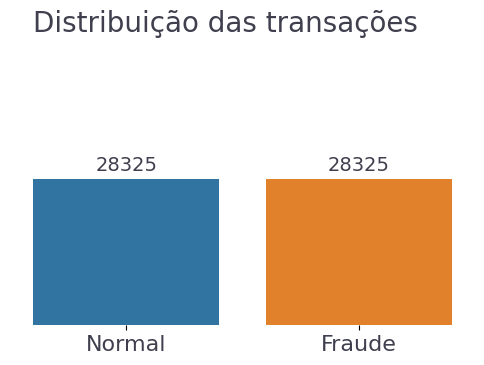

In [ ]:
rus = RandomUnderSampler()
X_under, y_under = rus.fit_resample(X_over, y_over)

fig, ax = plt.subplots(figsize=(6,2))

sns.countplot(data = df, x = y_under);

ax.set_frame_on(False)

ax.text(-0.4, len(X_under), 'Distribuição das transações', fontsize = 20, color = '#3f3f4e')

ax.get_yaxis().set_visible(False)
ax.set_xticklabels(['Normal', 'Fraude'], fontsize=16, color='#3f3f4e')
ax.set_xlabel('')

for i in ax.patches:
  ax.text(i.get_x() + i.get_width() / 2,
          i.get_height() + 1500,
          '{}'.format(int(i.get_height())),
          ha = 'center',
          fontsize=14, color='#3f3f4e')

## Divisão do dataset em treino e teste

20% dos dados ficarão separados para teste.

In [ ]:
# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, shuffle=True)

## Normalização dos dados

Aqui eu adotei mais uma medida visando evitar **vazamento de dados**: a normalização dos dados após a separação dos conjuntos de treino e teste.
Isso é importante porque "se você normalizar antes de dividir, a média e o desvio padrão usados ​​para normalizar os dados serão baseados no conjunto de dados completo e não no subconjunto de treinamento - portanto, vazando informações sobre os conjuntos de teste ou validação no conjunto de treinamento."

[Aqui](https://towardsdatascience.com/preventing-data-leakage-in-your-machine-learning-model-9ae54b3cd1fb) tem um artigo que explica sobre vazamento de dados em modelos de machine learning.

In [ ]:
scaler = StandardScaler()

X_train['std_amount'] = scaler.fit_transform(X_train['Amount'].values.reshape(-1, 1))
X_train['std_time'] = scaler.fit_transform(X_train['Time'].values.reshape(-1, 1))

X_test['std_amount'] = scaler.fit_transform(X_test['Amount'].values.reshape(-1, 1))
X_test['std_time'] = scaler.fit_transform(X_test['Time'].values.reshape(-1, 1))

X_train.drop(['Time', 'Amount'], axis=1, inplace=True)
X_test.drop(['Time', 'Amount'], axis=1, inplace=True)

In [ ]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,std_amount,std_time
35222,-9.684695,6.822592,-12.360716,4.656055,-7.502082,-2.548214,-8.334898,6.854266,-2.864975,-5.530058,...,0.947452,-0.925044,-0.473364,-0.178125,0.872344,-0.119111,0.995615,0.322180,-0.083854,-1.061697
767,-1.060967,-0.881507,-1.136987,-0.225562,-2.814118,2.674313,4.396381,-0.458576,0.353698,-1.450233,...,-0.286650,-0.480248,0.674373,0.198641,-0.030666,-0.588594,0.308743,-0.114434,4.468334,0.858928
1175,-0.317713,0.685553,1.724863,0.053420,0.034692,-0.334270,0.334764,-0.017312,0.032661,-0.731396,...,-0.081437,-0.085732,-0.040306,-0.011808,-0.465263,-0.447240,0.196441,0.166600,-0.371932,1.852532
13131,1.036268,-0.209116,1.333516,1.653787,-0.781205,0.788407,-0.667757,0.441198,1.038398,-0.233009,...,-0.359314,-0.596690,0.107963,0.207760,0.357526,-0.537099,0.086672,0.018389,-0.375719,0.038882
54359,-4.861150,5.016455,-7.578701,7.461379,-2.534481,-1.782067,-6.004727,2.637668,-4.136276,-7.296473,...,1.262626,0.569707,-0.140581,-0.484609,-0.047639,0.370858,-0.037120,-0.415765,-0.391128,0.528550


## Modelos de Machine Learning

#### **Entendendo as métricas**

Algo importante a ser lembrado é que de nada adiantaria criar modelos de aprendizagem de máquina e não saber se eles são realmente bons e úteis. Para descobrir isso, são analisadas algumas métricas, que serão explicadas agora.

##### **Acurácia**
Diz quanto o meu modelo acertou das previsões possíveis. É a razão entre o somatório das previsões corretas (verdadeiros positivos com verdadeiros negativos) sobre o somatório das previsões.

<p align=center>
<img src="https://miro.medium.com/max/589/1*tNTpugu1beoC3f6ivswnsA.png" width="50%"></p>

##### **Recall**
No material do Google Developers para Machine Learning, podemos ver que recall responde a seguinte pergunta: qual proporção de positivos foi identificados corretamente? Em outras palavras, quão bom meu modelo é para prever positivos, sendo positivo entendido como a classe que se quer prever, no nosso contexto, se a mulher está grávida. É definido como a razão entre verdadeiros positivos sobre a soma de verdadeiros positivos com negativos falsos.

<p align=center>
<img src="https://miro.medium.com/max/300/1*zgmkLfNNRtFwCHp8m46AKA.png" width="25%"></p>

##### **Precisão**
Ainda usando o material do Google Developers, eles definem precisão como a resposta para a seguinte pergunta: Qual a proporção de identificações positivas foi realmente correta? Em outras palavras, o qual bem meu modelo trabalhou.

<p align=center>
<img src="https://miro.medium.com/max/300/1*pJrHo_sp-pnLFl6Ww3imUw.png" width="25%"></p>

##### **f1-score**
Já o f1-score nos mostra o balanço entre a precisão e o recall de nosso modelo. Sua fórmula é:

<p align=center>
<img src="https://miro.medium.com/max/300/1*sBVtY3BJoJbOs47ZZx46tA.png" width="25%"></p>

Os cálculos acima visam entender o seu modelo sobre os dados positivos, ou seja, se a transação é fraudulenta.

### Regressão logística
A regressão logística é um algoritmo de classificação usado para atribuir observações a um conjunto discreto de classes. Alguns dos exemplos de problemas de classificação são spam de e-mail ou não spam, transações on-line fraudulentas ou não fraudulentas, tumor maligno ou benigno. A regressão logística transforma sua saída usando a função sigmóide logística para retornar um valor de probabilidade.

Se você quiser entender mais [recomendo este artigo](https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148).

In [ ]:
regressaoLogistica = LogisticRegression()

In [ ]:
%time regressaoLogistica.fit(X_train, y_train)

CPU times: user 813 ms, sys: 297 ms, total: 1.11 s
Wall time: 1.2 s


LogisticRegression()

In [ ]:
#Previsão dos resultados do modelo de Regressão Logística

%time
y_pred_rl = regressaoLogistica.predict(X_test)
print(classification_report(y_test, y_pred_rl, digits = 4))

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.39 µs
              precision    recall  f1-score   support

           0     0.9958    0.9967    0.9962      5722
           1     0.9966    0.9957    0.9962      5608

    accuracy                         0.9962     11330
   macro avg     0.9962    0.9962    0.9962     11330
weighted avg     0.9962    0.9962    0.9962     11330



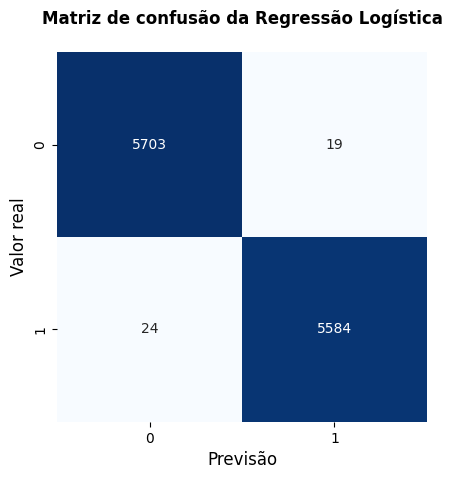

In [ ]:
matriz = confusion_matrix(y_test, y_pred_rl)
sns.heatmap(matriz, square=True, annot=True, cbar=False, cmap= 'Blues', fmt='.0f')

plt.title('Matriz de confusão da Regressão Logística',
          fontsize = 12,
          color = '#000000',
          pad= 20,
          fontweight= 'bold')

plt.xlabel('Previsão',fontsize = 12, color= '#000000')
plt.ylabel('Valor real'  ,fontsize = 12, color= '#000000')

plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rl)
roc_auc = roc_auc_score(y_test, y_pred_rl)

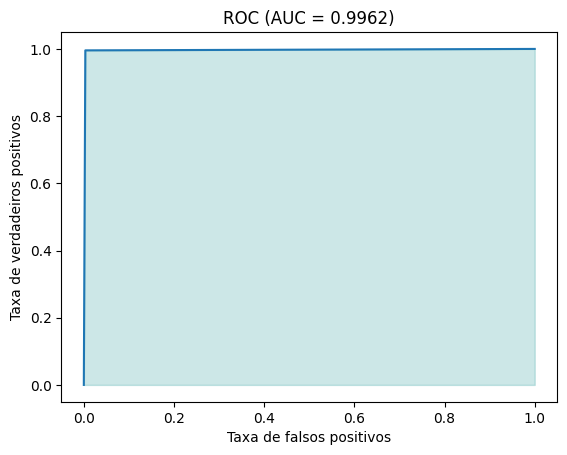

In [ ]:
plt.plot(fpr, tpr)
plt.xlabel('Taxa de falsos positivos')
plt.ylabel('Taxa de verdadeiros positivos')
plt.title('ROC (AUC = {:.4f})'.format(roc_auc))
plt.fill_between(fpr, tpr, alpha = 0.2, color = 'darkcyan')
plt.show()

### Árvore de decsião
É um algoritmo de aprendizado supervisionado para Machine Learning, e pode ser usado tanto para classificação quanto para regressão. Uma Decision Tree é construída a partir de um processo de indução, que vai dividindo os dados em subconjuntos cada vez mais puros.

Esse algoritmo contém hiperparâmetros que visam evitar um possível *overfitting*, um deles é o min_samples_leaf (que limita quantas folhas terão em cada nível da árvore). Caso os hiperparâmetros não sejam informados, o algoritmo treinará o modelo até a profundidade que achar melhor, o que o deixa susceptível a outliers e aumenta a probabilidade de *overfitting*.

Saiba mais [aqui](https://towardsdatascience.com/decision-tree-in-machine-learning-e380942a4c96) e [aqui](https://towardsdatascience.com/the-complete-guide-to-decision-trees-28a4e3c7be14).

In [ ]:
arvoreDecisao = DecisionTreeClassifier(
    min_samples_leaf= 3, random_state= 42,)

In [ ]:
%time arvoreDecisao.fit(X_train, y_train)

CPU times: user 2.59 s, sys: 3.57 ms, total: 2.6 s
Wall time: 2.6 s


DecisionTreeClassifier(min_samples_leaf=3, random_state=42)

In [ ]:
%time
y_pred_ad = arvoreDecisao.predict(X_test)
print(classification_report(y_test, y_pred_ad, digits = 4))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs
              precision    recall  f1-score   support

           0     0.9976    0.9988    0.9982      5722
           1     0.9988    0.9975    0.9981      5608

    accuracy                         0.9981     11330
   macro avg     0.9982    0.9981    0.9981     11330
weighted avg     0.9981    0.9981    0.9981     11330



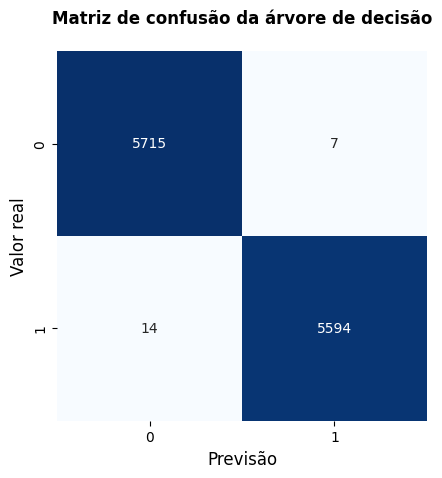

In [ ]:
matriz = confusion_matrix(y_test, y_pred_ad)
sns.heatmap(matriz, square=True, annot=True, cbar=False, cmap= 'Blues', fmt='.0f')

plt.title('Matriz de confusão da árvore de decisão',
          fontsize = 12,
          color = '#000000',
          pad= 20,
          fontweight= 'bold')

plt.xlabel('Previsão',fontsize = 12, color= '#000000')
plt.ylabel('Valor real'  ,fontsize = 12, color= '#000000')

plt.show()

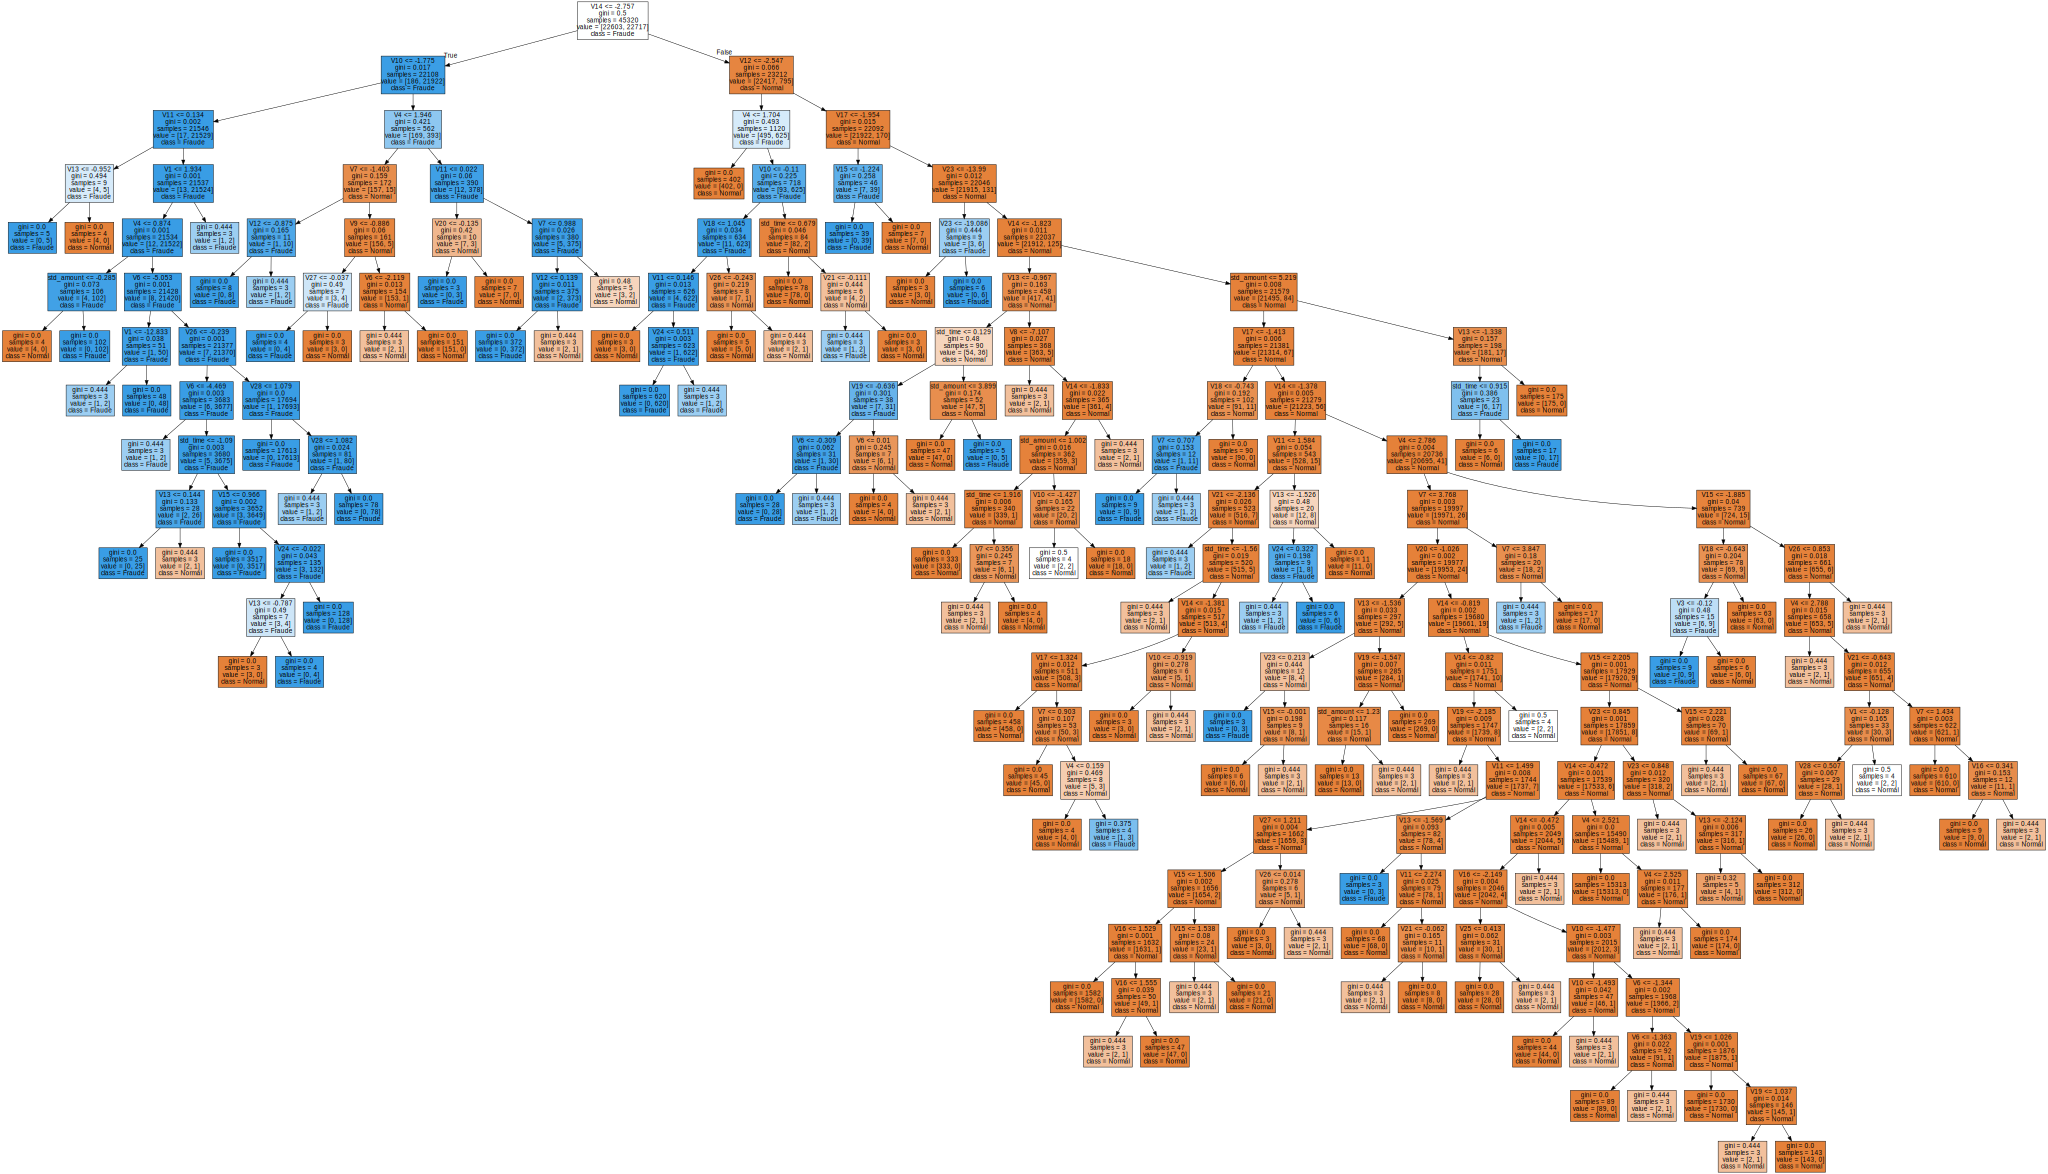

In [ ]:
dot_data = export_graphviz(arvoreDecisao,
                           feature_names=X_train.columns,
                           class_names=['Normal', 'Fraude'], filled=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ad)
roc_auc = roc_auc_score(y_test, y_pred_ad)

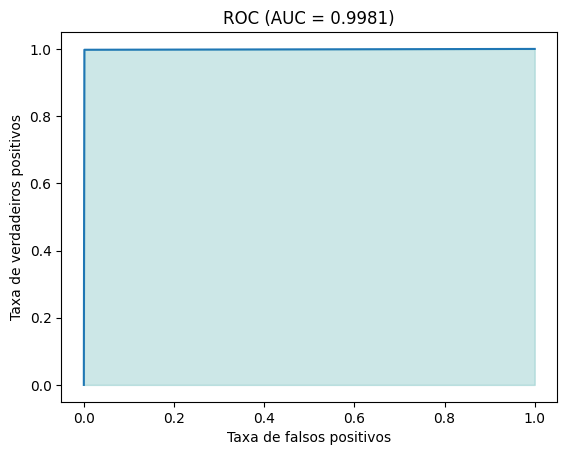

In [ ]:
plt.plot(fpr, tpr)
plt.xlabel('Taxa de falsos positivos')
plt.ylabel('Taxa de verdadeiros positivos')
plt.title('ROC (AUC = {:.4f})'.format(roc_auc))
plt.fill_between(fpr, tpr, alpha = 0.2, color = 'darkcyan')
plt.show()

### XGB

A principal ideia por trás do XGBoost é combinar vários modelos de árvore de decisão simples para criar um modelo preditivo mais poderoso. Ele usa o conceito de boosting, que é um método de treinamento sequencial, em que cada novo modelo é treinado para corrigir os erros cometidos pelos modelos anteriores.

In [ ]:
modelXGB = xgb.XGBClassifier()

In [ ]:
%time
modelXGB.fit(X_train, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
%time
y_pred_xgb = modelXGB.predict(X_test)
print(classification_report(y_test, y_pred_xgb, digits = 4))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs
              precision    recall  f1-score   support

           0     0.9977    0.9997    0.9987      5722
           1     0.9996    0.9977    0.9987      5608

    accuracy                         0.9987     11330
   macro avg     0.9987    0.9987    0.9987     11330
weighted avg     0.9987    0.9987    0.9987     11330



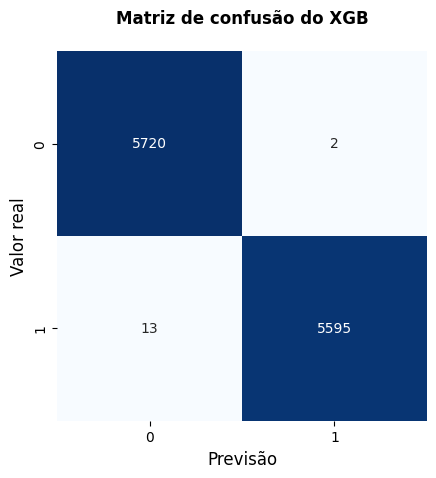

In [ ]:
matriz = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(matriz, square=True, annot=True, cbar=False, cmap= 'Blues', fmt='.0f')

plt.title('Matriz de confusão do XGB',
          fontsize = 12,
          color = '#000000',
          pad= 20,
          fontweight= 'bold')

plt.xlabel('Previsão',fontsize = 12, color= '#000000')
plt.ylabel('Valor real'  ,fontsize = 12, color= '#000000')

plt.show()

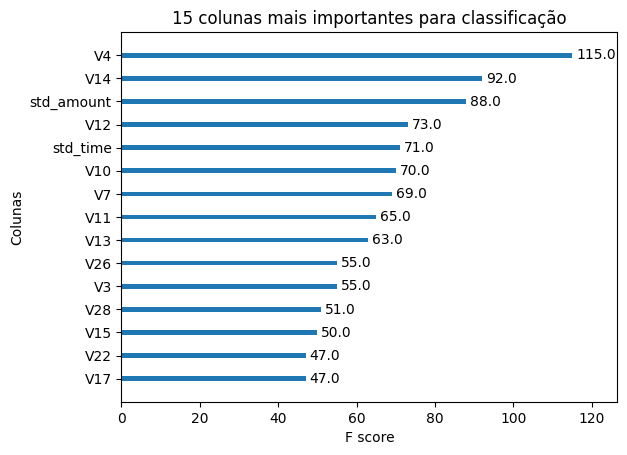

In [ ]:
xgb.plot_importance(modelXGB, grid=False, ylabel='Colunas',
                    max_num_features=15,
                    title='15 colunas mais importantes para classificação')
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)
roc_auc = roc_auc_score(y_test, y_pred_xgb)

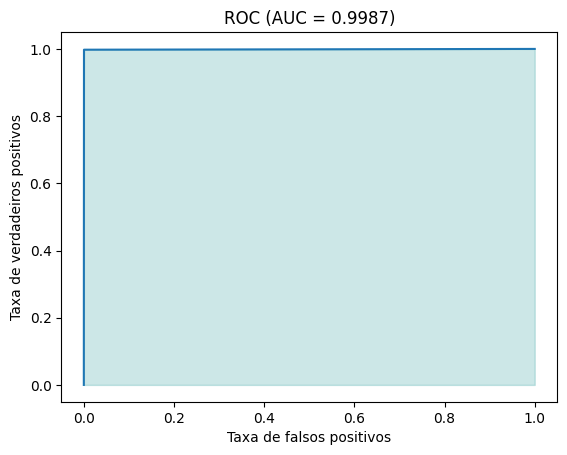

In [ ]:
plt.plot(fpr, tpr)
plt.xlabel('Taxa de falsos positivos')
plt.ylabel('Taxa de verdadeiros positivos')
plt.title('ROC (AUC = {:.4f})'.format(roc_auc))
plt.fill_between(fpr, tpr, alpha = 0.2, color = 'darkcyan')
plt.show()

## Visualização das métricas

In [ ]:
# Criando um dataframe para salvar as métricas
cols = ['modelo', 'acurácia', 'recall', 'precisão', 'f1_score', 'roc_auc']
df_metricas = pd.DataFrame(columns=cols)

In [ ]:
def salva_dataframe(modelo, y_test, y_pred):
  accuracy  = metrics.accuracy_score(y_test,y_pred)
  recall = metrics.recall_score(y_test, y_pred)
  precision = metrics.precision_score(y_test, y_pred)
  f1_score = metrics.f1_score(y_test,y_pred)
  roc_auc = roc_auc = roc_auc_score(y_test, y_pred)

  df_metricas.loc[len(df_metricas.index)] = [modelo, accuracy, recall, precision, f1_score, roc_auc]

In [ ]:
salva_dataframe('Regressao logística', y_test, y_pred_rl)
salva_dataframe('Árvore de decisão', y_test, y_pred_ad)
salva_dataframe('XGB', y_test, y_pred_xgb)
# salva_dataframe('SGD', y_test, y_pred_sgd)

df_metricas = pd.melt(df_metricas, id_vars=['modelo'], var_name='métricas', value_name='valores')

fig = px.bar(df_metricas,
             x="modelo",
             y='valores',
             title="Estatísticas dos modelos",
             barmode='group',
             color="métricas",
             color_discrete_map={
              'acurácia': 'darkturquoise',
              'recall': 'darkslategrey',
              'precisão': 'darkgoldenrod',
              'f1_score': 'darkmagenta',
              'roc_auc': 'green'
              }
            )

fig.show()

## Conclusão


Todos os modelos tiveram resultados satisfatórios, porém o XGB se sobressaiu aos outros em todas as métricas, principalmente em relação aos **falsos positivos**, que seriam transações fraudulentas serem reconhecidas como normais.

Outro ponto positivo é que ele mostra quais variáveis têm maior influência nas decisões tomadas pelo modelo.

Mas isso não significa que se deva ignorar a árvore. A imagem criada à partir dela é muito boa para que se possa entender o que a levou a classificar determinada transação como fraudulenta. No *dataset* utilizado, as transações estão com as colunas anonimizadas, mas, se fosse um projeto executado em uma empresa, com dados próprios e não anonimizados, usar a árvore seria muito eficiente para cuidar das variáveis mais sensíveis para tentar prevenir ou monitorar transações possivelmente fraudulentas.